# <b>Old Car price prediction Using Machine Learning<b>

The objective of this project is to determine the accurate price of a second-hand car. Based on specifications such as the number of years the car has been used, fuel type, total KM it has run, etc. a predictive model can be built to estimate the appropriate price.

In [1]:
# Supressing the warning messages.
import warnings
warnings.filterwarnings('ignore')

## Reading the data
The file CarPricesData.csv contains historical data on old car prices based on their specifications. The goal is to learn from this data and predict the correct price of a used car.

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np

CarPricesData=pd.read_csv('CarPricesData.csv', encoding='latin')
CarPricesData.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


**Data description**

The business meaning of each column in the data is as below
- **Price:** The Price of the car in dollars
- **Age:** The age of the car in months
- **KM:** How many KMS did the car was used
- **FuelType:** Petrol/Diesel/CNG car
- **HP:** Horse power of the car
- **MetColor:** Whether car has metallic color or not
- **Automatic:** Whether car has automatic transmission or not
- **CC:** The engine size of the car
- **Doors:** The number of doors in the car
- **Weight:** The weight of the car

**Removing Removing duplicate rows if any**

In [3]:
print('Shape before deleting duplicate values:', CarPricesData.shape)

# Removing duplicate rows if any
CarPricesData=CarPricesData.drop_duplicates()
print('Shape After deleting duplicate values:', CarPricesData.shape)

Shape before deleting duplicate values: (1436, 10)
Shape After deleting duplicate values: (1435, 10)


## Defining the problem statement : 
Create a ML model which can predict the apt Price of a Car
- **Target Variable:** Price
- **Predictors:** Age, KM, FuelType, CC etc.

**Determining the type of Machine Learning:** Based on the problem statement, a supervised ML regression model needs to be created since the target variable is continuous.

## Looking at the distribution of Target variable
If the target variable's distribution is highly skewed, it can negatively impact predictive modeling, as many machine learning algorithms assume a more balanced distribution. While a bell-shaped (normal) distribution is ideal, a slight positive or negative skew is generally acceptable. When performing regression, ensuring that the histogram of the target variable resembles a bell curve or a slightly skewed version helps improve the model’s ability to learn patterns effectively.

<Axes: >

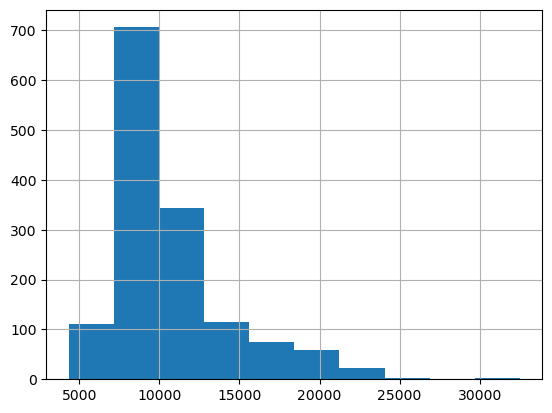

In [4]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
CarPricesData['Price'].hist()

- The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

## Basic Data Exploration
This step helps in understanding the overall data, including its size and column types (Quantitative, Categorical, or Qualitative). It also helps identify irrelevant columns by assessing their impact on the target variable. For example, if a column does not influence the price of the Car, it should be removed, otherwise, it should be kept for further analysis.

In [5]:
# Looking at sample rows in the data
CarPricesData.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [6]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
CarPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [7]:
# Looking at the descriptive statistics of the data
CarPricesData.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1431,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10720.915679,56.020237,68571.782578,NaN,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,NaN,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [8]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the number of unique values are < 20 then the variable is likely to be a category otherwise continuous
CarPricesData.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [9]:
# Finding how many missing values are there for each column
CarPricesData.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

**Basic Data Exploration Results**

Based on the basic data exploration, create a simple report summarizing the data and noting observations for each column.

* <b>Price</b>: Continuous | Selected | This is the <b>Target Variable!</b>
* <b>Age</b>: Continuous | Selected | Missing value treatment required.
* <b>KM</b>: Continuous | Selected 
* <b>FuelType</b>: Categorical | Selected | Missing value treatment required.
* <b>HP</b>: Categorical | Selected 
* <b>MetColor</b>: Categorical | Selected 
* <b>Automatic</b>: Categorical | Selected 
* <b>CC</b>: Categorical | Selected | Missing value treatment required.
* <b>Doors</b>: Categorical | Selected 
* <b>Weight</b>: Continuous | Selected | Missing value treatment required.

The selected columns at this stage are not final, further analysis will be conducted before creating the final list.

## Removing useless columns from the data:
There are no qualitative columns in this data

### Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

**Visualize distribution of all the Categorical Predictor variables in the data using bar plots**

Based on the basic data exploration, the data contains six categorical predictors: 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors'
    
Bar charts are used to visualize the distribution of data for categorical predictors.

In [10]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

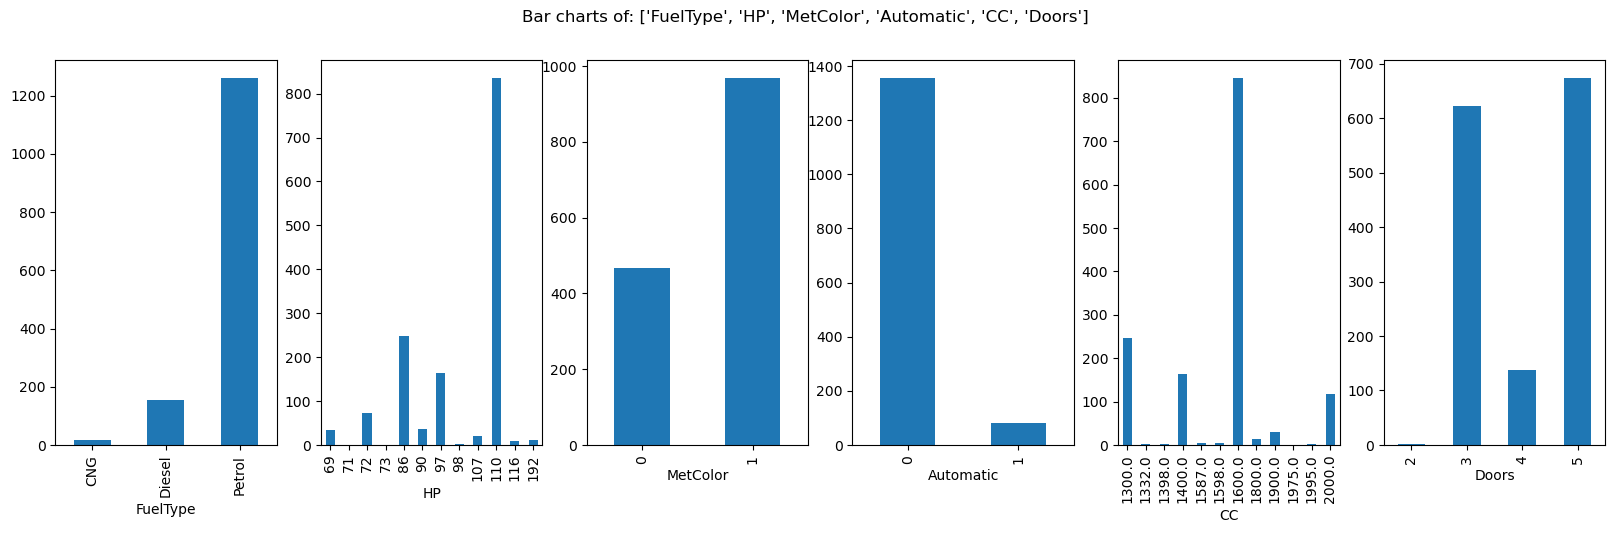

In [11]:
# Calling the function
PlotBarCharts(inpData=CarPricesData, colsToPlot=['FuelType', 'HP', 'MetColor', 
                                                 'Automatic', 'CC', 'Doors'])

**Bar Charts Interpretation**

These bar charts show category frequencies on the Y-axis and category names on the X-axis.

Ideally, each category should have a comparable frequency, ensuring enough data for the ML algorithm to learn effectively. If a column has a highly skewed distribution, with one dominant category and others appearing rarely, it may not be useful for machine learning. The final decision to keep or remove such columns is made during the correlation analysis. At this stage, all categorical variables are selected for further analysis.

**Visualize distribution of all the Continuous Predictor variables in the data using histograms**

Based on the basic data exploration, the data contains three continuous predictor: 'Age','KM' and 'Weight'

Histograms are used to visualize the distribution of continuous predictor.

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >]], dtype=object)

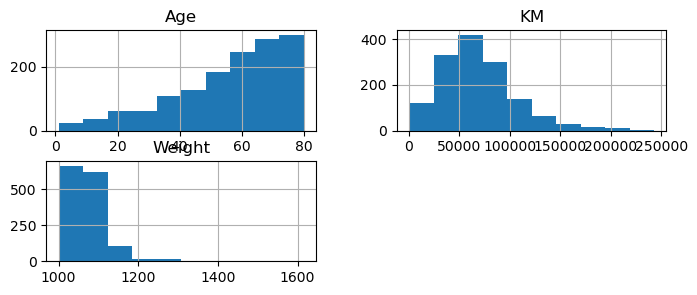

In [12]:
# Plotting histograms of multiple columns together
CarPricesData.hist(['Age','KM','Weight'], figsize=(8,3))

**Histogram Interpretation**

Histograms show the data distribution for each continuous variable. The X-axis represents the range of values, while the Y-axis shows the frequency of values within that range. The ideal histogram outcome is a bell curve or a slightly skewed bell curve. If there is excessive skewness, outlier treatment should be applied, and the column should be re-examined. If the issue persists, the column may be considered for removal.

**Selected Continuous Variables:**
- **Age:** Selected. The distribution is good.
- **KM:** Selected. The distribution is good.
- **Weight:** Selected. The distribution is good, but outliers beyond 1400 need to be treated.


## Outlier treatment
Outliers are extreme values that deviate significantly from most of the data. They can be identified by examining the tails of a histogram. Outliers can bias the training of machine learning models, as the algorithm may attempt to fit these extreme values, deviating from the majority of the data.

Outliers should be treated one column at a time, as the appropriate treatment may vary for each column. Outlier values are imputed with a logical business value, determined through histogram analysis.

**Treating outliers for 'Weight' column**

In [13]:
# From histogram outliers are seen beyond 1400, need to treat them.
# Finding logical value near to 1400 for Weight column
CarPricesData['Weight'][CarPricesData['Weight']<1400].sort_values(ascending=False)

112     1320.0
138     1320.0
115     1280.0
119     1275.0
68      1275.0
         ...  
927     1000.0
1410    1000.0
605     1000.0
1021    1000.0
957     1000.0
Name: Weight, Length: 1428, dtype: float64

In [14]:
# Based on the above result the nearest logical value is 1320, hence, replacing any value greater than 1400 with it.
# Replacing outliers with nearest logical value
CarPricesData['Weight'][CarPricesData['Weight']>1400]=1320

**Visualizing the distribution again after outlier treatment**

<Axes: >

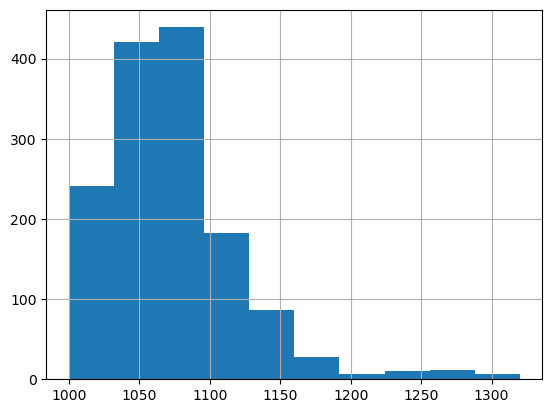

In [15]:
# Histogram for weight after outlier treatment
CarPricesData['Weight'].hist()

- The distribution has improved after the outlier treatment. There is still a tail on the right side, but it is thick, hence it is acceptable.

--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------

#### Identifying outlier using IQR and Cap outliers to the lower and upper bounds

In [16]:
# Capping (Winsorizing) method

def cap_outliers_iqr(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers to the lower and upper bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------

## Missing values treatment
If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.
Missing values are treated for each column separately.

Here, missing values are treated using the following approach:
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables

In [17]:
# Finding how many missing values are there for each column
CarPricesData.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

In [18]:
# Treating missing values for categorical variable with MODE value
CarPricesData['FuelType'].fillna(value=CarPricesData['FuelType'].mode()[0], inplace=True)
CarPricesData['CC'].fillna(value=CarPricesData['CC'].mode()[0], inplace=True)

In [19]:
# Treating missing values for continuous variable with Median value
CarPricesData['Weight'].fillna(value=CarPricesData['Weight'].median(), inplace=True)
CarPricesData['Age'].fillna(value=CarPricesData['Age'].median(), inplace=True)

In [20]:
# Checking missing values again after the treatment
CarPricesData.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

## Feature Selection
Now, it is time to select the best features (columns) that are correlated with the target variable. This can be done by measuring correlation values or using statistical tests like ANOVA and Chi-Square. Additionally, visualizing the relationship between the target variable and predictors helps in understanding the data better. Below are the techniques used for both visualizing relationships and statistically measuring their strength.

**Continuous Target Variable Vs Continuous Predictor**
- Scatter Plot - Visual exploration
- Correlation matrix - Statistical measurement

**Continuous Target Variable Vs Categorical Predictor**
- Box Plot - Visual exploration
- ANOVA test - Statistical measurement

<b>Relationship exploration: Continuous Vs Continuous - Scatter Charts<b>

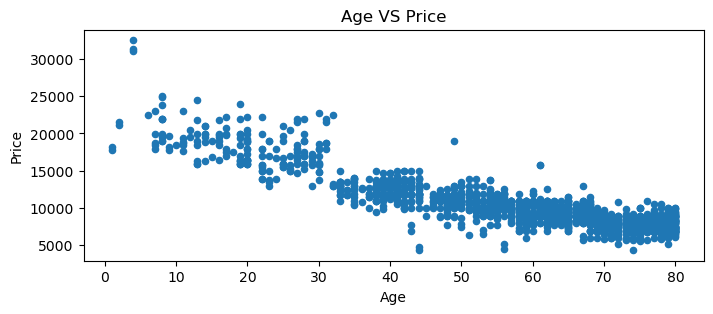

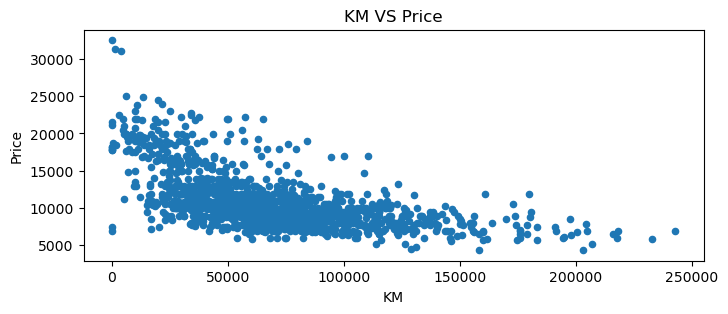

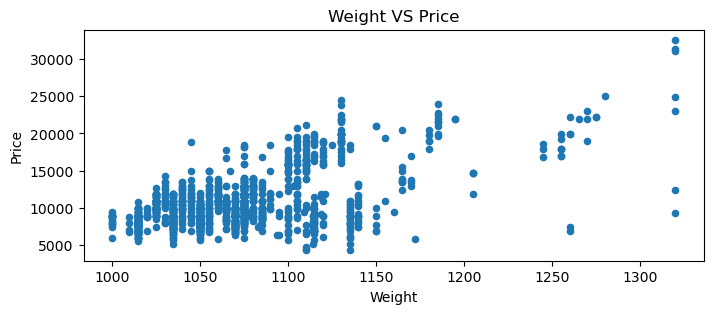

In [21]:
ContinuousCols=['Age','KM','Weight']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    CarPricesData.plot.scatter(x=predictor, y='Price', figsize=(8,3), title=predictor+" VS "+ 'Price')

**Scatter charts interpretation**

Scatter charts help identify trends between two variables. There are three possible scenarios:  
1. **Increasing Trend:** Both variables move in the same direction (positively correlated). As one increases, the other also increases. This is useful for ML.  
2. **Decreasing Trend:** The variables move in opposite directions (negatively correlated). As one increases, the other decreases. This is also useful for ML.  
3. **No Trend:** No clear pattern is observed, meaning there is no correlation. Such predictors may not be useful for ML.

Based on the scatter charts, all three continuous predictors show a strong relationship with the target variable. This conclusion is further confirmed by the correlation values.

<b>Statistical Feature Selection (Continuous Vs Continuous) using Correlation value</b>

If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship, the sign does not matter

In [22]:
# Calculating correlation matrix
ContinuousCols=['Price','Age','KM','Weight']

# Creating the correlation matrix
CorrelationData=CarPricesData[ContinuousCols].corr()
CorrelationData

,Price,Age,KM,Weight
Price,1.000000,-0.874196,-0.569420,0.589002
Age,-0.874196,1.000000,0.502604,-0.488324
KM,-0.569420,0.502604,1.000000,-0.013607
Weight,0.589002,-0.488324,-0.013607,1.000000


In [23]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

Price     1.000000
Age      -0.874196
KM       -0.569420
Weight    0.589002
Name: Price, dtype: float64

- Final selected Continuous columns : **'Age', 'KM', 'Weight'**

<b> Relationship exploration: Categorical Vs Continuous - Box Plots <b>

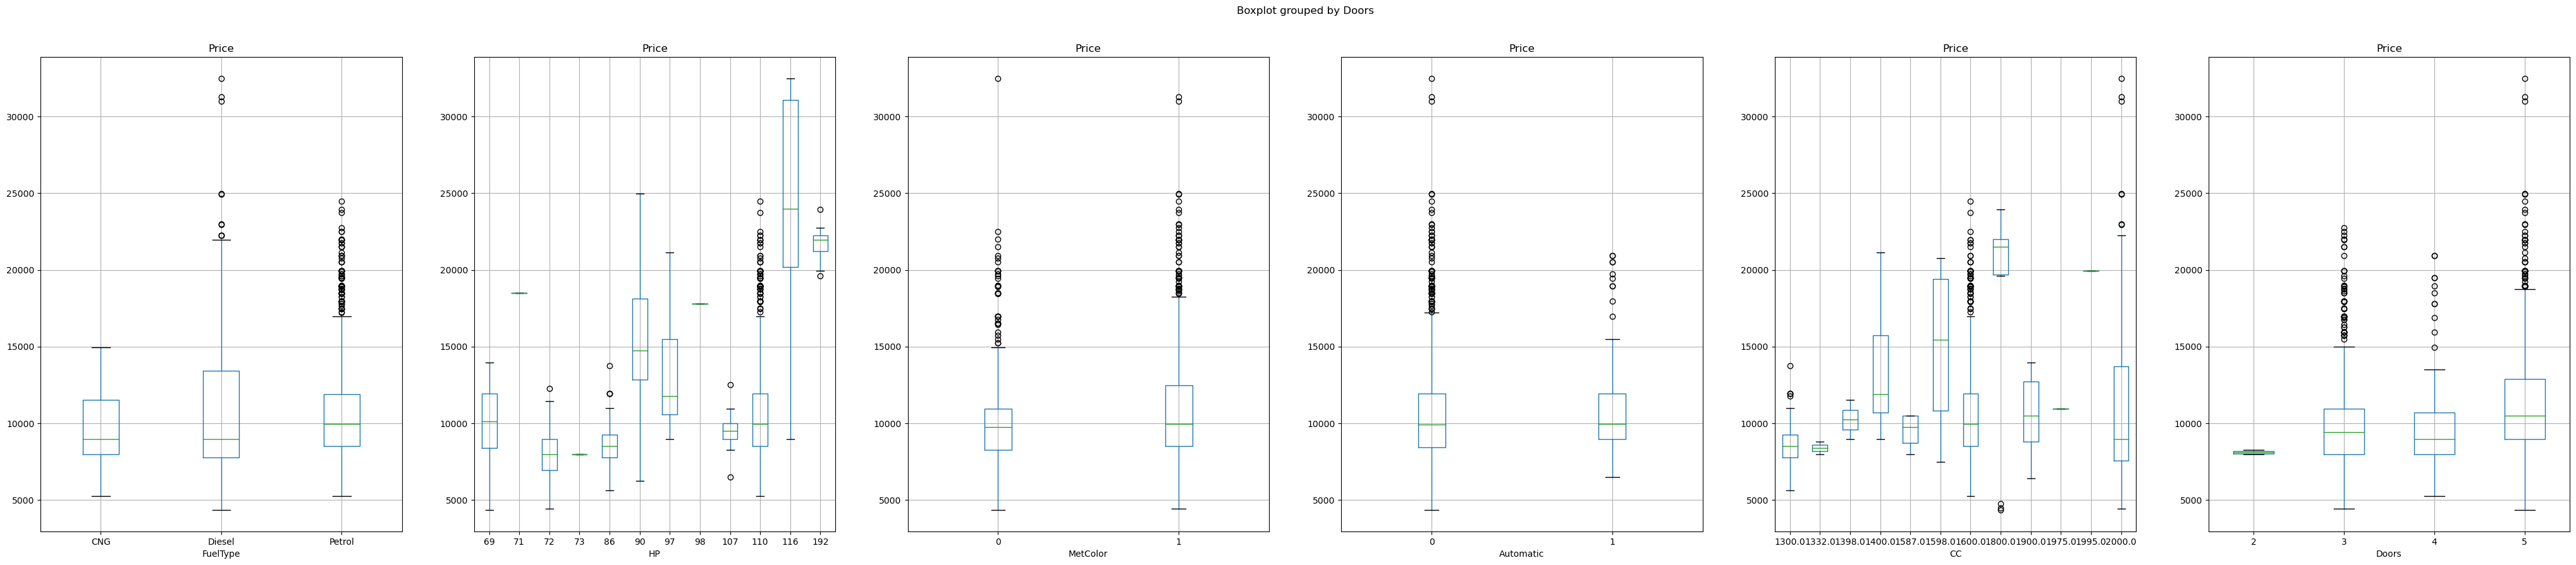

In [24]:
# Box plots for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(50,10))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CarPricesData.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

**Box-Plots interpretation**

These plots show the distribution of a continuous predictor (Y-axis) across different categories (X-axis).  

- If the distributions are similar across categories (boxes aligned), the continuous variable likely has no effect on the target variable, indicating no correlation.  
- If the distributions differ (boxes at different levels), the variable may be correlated with the target variable.  

In this data, most categorical predictors appear correlated with the target variable, except **"FuelType," "Automatic," and "MetColor,"** which are borderline cases since their distributions are close. This is further validated using the ANOVA test.

<b>Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test</b>

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

In [25]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
        
    return(SelectedPredictors)

In [26]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']
FunctionAnova(inpData=CarPricesData, 
              TargetVariable='Price', 
              CategoricalPredictorList=CategoricalPredictorList)

FuelType is NOT correlated with Price | P-Value: 0.07590511356326429
HP is correlated with Price | P-Value: 4.403061434008212e-109
MetColor is correlated with Price | P-Value: 4.4173957971674025e-05
Automatic is NOT correlated with Price | P-Value: 0.19897717506836016
CC is correlated with Price | P-Value: 2.566835080246702e-47
Doors is correlated with Price | P-Value: 9.51180734144394e-13


['HP', 'MetColor', 'CC', 'Doors']

The ANOVA results confirm the visual analysis from the box plots.  

All categorical variables show a correlation with the target variable except "FuelType" and "Automatic," which aligns with the initial observation from the box plots.  

Final selected categorical columns:
**'HP', 'MetColor', 'CC', 'Doors'**

## Selecting final predictors for Machine Learning

In [27]:
# Based on the above tests, selecting the final columns for machine learning
SelectedColumns=['Age','KM','Weight','HP', 'MetColor', 'CC', 'Doors']

# Selecting final columns
DataForML=CarPricesData[SelectedColumns]

DataForML.head()

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3


In [28]:
# Saving this final data in serialized format for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning
Steps performed on predictor variables before using the data for machine learning: 

- Convert ordinal categorical columns to numeric.  
- Convert binary nominal categorical columns to numeric using 1/0 mapping.  
- Convert other nominal categorical columns to numeric using `pd.get_dummies()`.

**Converting each Ordinal Categorical columns to numeric**

In this data there is no Ordinal categorical variable which is in string format.

**Converting the binary nominal variable to numeric using 1/0 mapping**

There is no binary nominal variable in string format to be converted

**Converting the nominal variable to numeric using get_dummies()**

In [29]:
# Treating all the nominal categorical variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

In [30]:
# Adding Target Variable to the data
DataForML_Numeric['Price']=CarPricesData['Price']

# Printing sample rows
DataForML_Numeric.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


## Machine Learning: Splitting the data into Training and Testing sample
The entire dataset is not used for model creation. A portion of the data is randomly set aside to evaluate the model's performance, known as testing data, while the remaining data, called training data, is used to build the model. Typically, 70% of the data is allocated for training, and 30% is used for testing.

In [31]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors', 'Price'], dtype='object')

In [32]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

<b>Standardization/Normalization of data<b>

In [33]:
# Standardization/Normalization of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
# PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

**Splitting the data into Training and Testing sample**

In [34]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [35]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004,)
(431, 7)
(431,)


## Multiple Linear Regression

In [36]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression

RegModel = LinearRegression()

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))



# Creating predictions on Test data
prediction=LREG.predict(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())




# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)



# ------------- Cross Validation ----------------
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=5, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

R2 Value: 0.8651566951243632
   Price  PredictedPrice
0  10250         12595.0
1   6990          8015.0
2  10500         10100.0
3  19750         17922.0
4  14750         15981.0
Mean Accuracy on test data: 91.02315597905888
Median Accuracy on test data: 93.26256983240224

Accuracy values for 10-fold Cross Validation:
 [84.90355467 90.14853707 90.51562904 89.43845971 89.22123412]

Final Average Accuracy of the model: 88.85


## Decision Trees

R2 Value: 0.9326092633563705
   Price  PredictedPrice
0  10250         12553.0
1   6990          8235.0
2  10500         10252.0
3  19750         18485.0
4  14750         15785.0
Mean Accuracy on test data: 90.91080795918874
Median Accuracy on test data: 92.61762189905903

Accuracy values for 10-fold Cross Validation:
 [83.91517631 89.00008019 87.15762816 88.90783289 87.23040108 91.81161446
 92.85415646 80.4061886  90.31869215 90.66408799]

Final Average Accuracy of the model: 88.23


<Axes: >

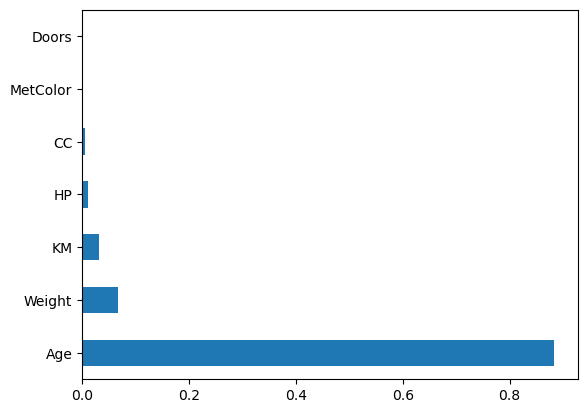

In [37]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor

RegModel = DecisionTreeRegressor(max_depth=6,criterion='friedman_mse')

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))



# Creating predictions on Test data
prediction=DT.predict(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())




# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)




# ------------- Cross Validation ----------------
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## Random Forest

R2 Value: 0.9312671479899661
   Price  PredictedPrice
0  10250         12396.0
1   6990          8154.0
2  10500         10111.0
3  19750         20021.0
4  14750         15766.0
Mean Accuracy on test data: 91.39042028245532
Median Accuracy on test data: 93.38666666666667

Accuracy values for 10-fold Cross Validation:
 [83.22435284 90.05612574 89.49953444 89.62188803 89.93462949 91.21216481
 93.02523173 85.72805242 91.24982807 90.22428077]

Final Average Accuracy of the model: 89.38


<Axes: >

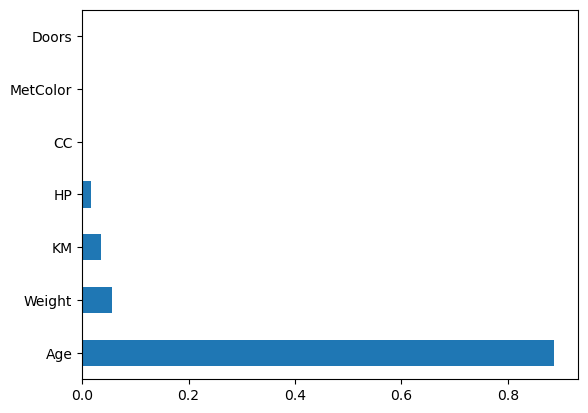

In [38]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor

RegModel = RandomForestRegressor(max_depth=5, n_estimators=200,criterion='friedman_mse')

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))



# creating predictions on Test data
prediction=RF.predict(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())




# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)



# ------------- Cross Validation ----------------
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## AdaBoost

R2 Value: 0.8068008811535177
   Price  PredictedPrice
0  10250         11534.0
1   6990          8666.0
2  10500         11475.0
3  19750         17849.0
4  14750         17566.0
Mean Accuracy on test data: 87.83677624854741
Median Accuracy on test data: 90.30379746835443

Accuracy values for 10-fold Cross Validation:
 [78.08878857 86.49085985 84.29475581 83.74981405 89.09713877 88.60094303
 88.63283957 79.36243893 86.35917878 88.43001374]

Final Average Accuracy of the model: 85.31


<Axes: >

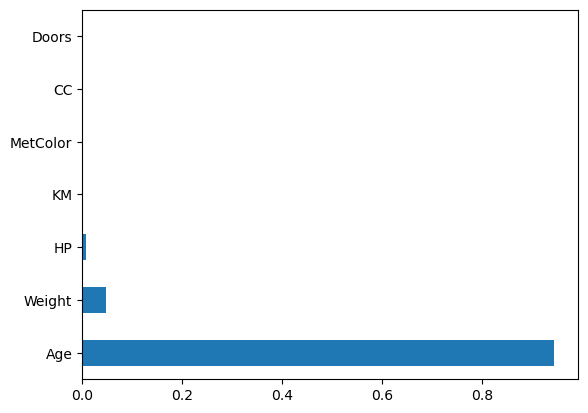

In [39]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(max_depth=2)
RegModel = AdaBoostRegressor(n_estimators=100, estimator=DTR ,learning_rate=0.01)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))




# creating predictions on Test data
prediction=AB.predict(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())




# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)




# ------------- Cross Validation ----------------
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## Xgboost

In [40]:
# Installing xgboost library
# !pip install xgboost

R2 Value: 0.9616482305290451
   Price  PredictedPrice
0  10250         11922.0
1   6990          8447.0
2  10500          9914.0
3  19750         20716.0
4  14750         16032.0
Mean Accuracy on test data: 92.02357016296133
Median Accuracy on test data: 93.94782608695652

Accuracy values for 10-fold Cross Validation:
 [84.1793684  90.61842782 90.29087805 91.62596677 90.66273192 92.46613128
 92.62374221 89.50968843 91.60682549 90.42824586]

Final Average Accuracy of the model: 90.4


<Axes: >

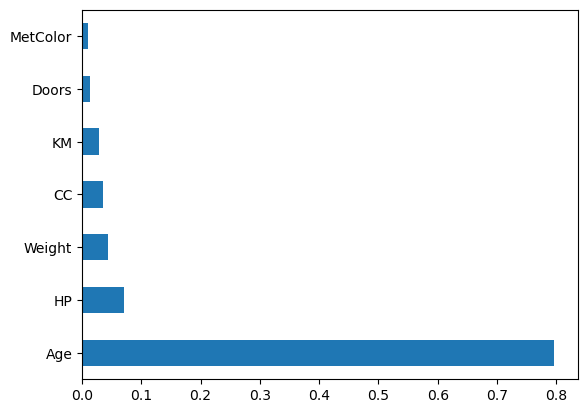

In [41]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor

RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=250, 
                      objective='reg:squarederror', booster='gbtree')

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))



# creating predictions on Test data
prediction=XGB.predict(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())




# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)



# ------------- Cross Validation ----------------
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## KNN

In [42]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor

RegModel = KNeighborsRegressor(n_neighbors=8)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))



# Creating predictions on Test data
prediction=KNN.predict(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())




# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)



# ------------- Cross Validation ----------------
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

R2 Value: 0.8871116238861869
   Price  PredictedPrice
0  10250         11500.0
1   6990          8300.0
2  10500          9062.0
3  19750         19969.0
4  14750         14675.0
Mean Accuracy on test data: 91.03321987968833
Median Accuracy on test data: 93.44981412639405

Accuracy values for 10-fold Cross Validation:
 [77.86870255 88.5596242  90.84414466 89.26285946 89.23581337 91.04096043
 91.36468312 84.92954034 90.21261857 87.68997604]

Final Average Accuracy of the model: 88.1


# Deployment of the Model

Based on the above trials, the algorithm with the best average accuracy is selected for the final model. In this case, multiple algorithms have shown similar accuracy, so any of them can be chosen. XGBoost is selected as the final model since it provides the best accuracy for this data.

To deploy the model, the following steps are followed:
1.	Train the model using 100% of the available data.
2.	Save the model as a serialized file for storage and future use.
3.	Develop a Python function that integrates with front-end applications to take inputs and return predictions.

------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Choosing only the most important variables**

It is beneficial to use fewer predictors when deploying a model in production. Fewer predictors make the model less dependent and more stable, especially in high-dimensional data with many features.  

In this dataset, the most important predictors are **'Age,' 'KM,' and 'Weight'**, as they consistently appear at the top of the variable importance charts across different algorithms. Therefore, these are selected as the final predictor variables.

In [43]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Age', 'KM', 'Weight']

# # Selecting final columns
# DataForML=CarPricesData[Predictors]
# DataForML.to_pickle('DataForML.pkl')

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1435, 3)
(1435,)


------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Step 1. Retraining the model using 100% data**

In [44]:
# Xtreme Gradient Boosting (XGBoost) - Using final hyperparameters
from xgboost import XGBRegressor

RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=250, 
                      objective='reg:squarederror', booster='gbtree')


# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

<b>Cross validating the final model accuracy with less predictors<b>

In [45]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [83.13023657 90.87761317 90.55740032 91.64357405 90.58315658 92.36759695
 92.61015811 88.87671891 91.51545893 90.35398932]

Final Average Accuracy of the model: 90.25


**Step 2. Save the model as a serialized file which can be stored anywhere**

In [46]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Lenovo\Desktop\IVY\Machine Learning\Personal Projects\Old Car Price Prediction


**Step 3. Create a python function**

In [47]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    # InputData=InputData.append(DataForML)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    
    # Treating missing values of continuous variable with Median value
    # Added by Sourabh!
    InputData['Weight'].fillna(value=InputData['Weight'].median(), inplace=True)
    InputData['Age'].fillna(value=InputData['Age'].median(), inplace=True)
    InputData['KM'].fillna(value=InputData['KM'].median(), inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
    
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['Age', 'KM', 'Weight']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # GenPrice Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

## Testing Model with Sample Data

In [48]:
# Creating some new data for testing our Model
NewSampleData=pd.DataFrame(
data=[[23,46986,1165],
     [20,380,1170],
     [10,380,1170]],
columns=['Age', 'KM', 'Weight'])

print(NewSampleData)

   Age     KM  Weight
0   23  46986    1165
1   20    380    1170
2   10    380    1170


In [49]:
# Calling the Function for prediction
PredictionResult=FunctionPredictResult(InputData= NewSampleData)
PredictionResult

,Prediction
0,14885.0
1,17857.0
2,19074.0
